In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)


### What is the structure of your dataset?

There are 7043 customers in the dataset with 20 features. With 3 numeric features (`Seniorcitizen and Monthlycharges` are **continous**, and `Tenure` is **discrete**), 1 **ordinal** feature (`Contract`) and the rest are **nominal** features.

#### Columns Descriptions:

- **`customerID`**
- **`gender`:** male or female
- **`SeniorCitizen`:** Whether the customer is a senior citizen or not (1, 0) (an elderly person especially : one who has retired)
- **`Partner`:** Whether the customer has a partner or not (Yes, No)
- **`Dependents`:** Whether the customer has dependents or not (Yes, No)
- **`tenure`:** Number of months the customer has stayed with the company
- **`PhoneService`:** Whether the customer has a phone service or not (Yes, No)
- **`MultipleLines`:** Whether the customer has multiple lines or not (Yes, No, No phone service)
- **`InternetService`:** Customer’s internet service provider (DSL, Fiber optic, No)
- **`OnlineSecurity`:** Whether the customer has online security or not (Yes, No, No internet service)
- **`OnlineBackup`:** Whether the customer has online backup or not (Yes, No, No internet service)


#### Columns Descriptions:

- **`DeviceProtection`:** Whether the customer has device protection or not (Yes, No, No internet service)
- **`TechSupport`:** Whether the customer has tech support or not (Yes, No, No internet service)
- **`StreamingTV`:** Whether the customer has streaming TV or not (Yes, No, No internet service)
- **`StreamingMovies`:** Whether the customer has streaming movies or not (Yes, No, No internet service)
- **`Contract`:** The contract term of the customer (Month-to-month, One year, Two year)
- **`PaperlessBilling`:** Whether the customer has paperless billing or not (Yes, No)
- **`PaymentMethod`:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **`MonthlyCharges`:** The amount charged to the customer monthly
- **`TotalCharges`:** The total amount charged to the customer
- **`Churn`:** Whether the customer churned or not (Yes or No)

In [174]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [175]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [5]:
df.shape

(7043, 21)

In [24]:
NumCols = (lambda x: x for x in df.columns if x.dtypes == 'int64')

In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [53]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [176]:
df.duplicated().sum()

0

In [177]:
df = df.drop(['customerID'],axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [178]:
df.duplicated().sum()

22

In [179]:
df = df.drop_duplicates()

In [180]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [181]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

# Exploration

In [182]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

(array([1590.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

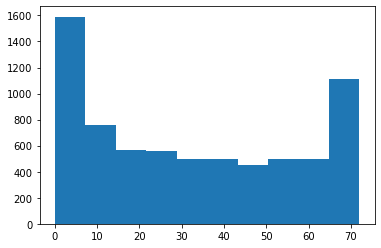

In [183]:
plt.hist(x='tenure',data=df)

In [184]:
df['Churn_OHE'] = df['Churn'].map({'Yes':'1','No':0})
df['Churn_OHE']

<ipython-input-184-22ff6bb57eee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn_OHE'] = df['Churn'].map({'Yes':'1','No':0})


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_OHE, Length: 7021, dtype: object

## Correlation between numerical and categorical variables

In [94]:
from scipy import stats
print(stats.pointbiserialr(x= df['Churn_OHE'],y=df['SeniorCitizen']))
print(stats.pointbiserialr(x= df['Churn_OHE'],y=df['MonthlyCharges']))
print(stats.pointbiserialr(x= df['Churn_OHE'],y=df['tenure']))

PointbiserialrResult(correlation=0.1516185381216067, pvalue=2.2328191178977786e-37)
PointbiserialrResult(correlation=0.19450773779536623, pvalue=8.041921866103535e-61)
PointbiserialrResult(correlation=-0.35150799715183867, pvalue=2.6280951730518803e-203)


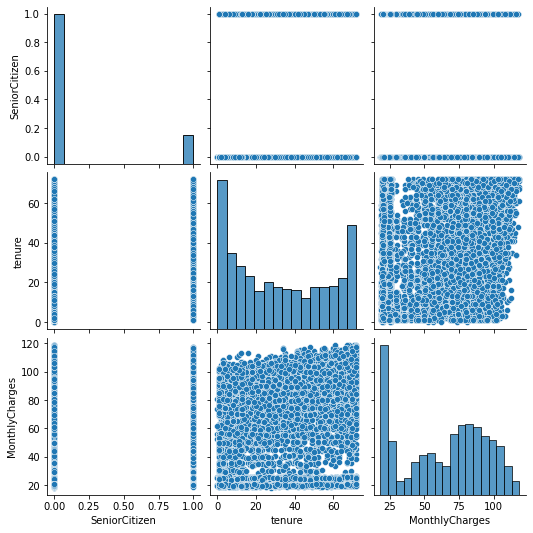

In [98]:
sns.pairplot(df)

(array([1592.,  191.,  363.,  639.,  473.,  889.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

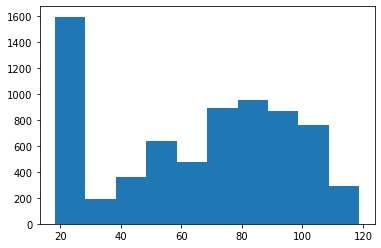

In [102]:
plt.hist(x=df['MonthlyCharges'])

((array([1592.,  190.,  359.,  636.,  473.,  874.,  956.,  866.,  760.,
          310.,    5.]),
  array([ 18.25,  28.25,  38.25,  48.25,  58.25,  68.25,  78.25,  88.25,
          98.25, 108.25, 118.25, 128.25]),
  <BarContainer object of 11 artists>),)

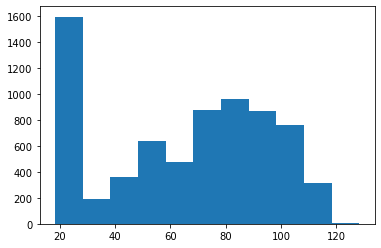

In [114]:
plt.hist(df['MonthlyCharges'], bins=np.arange(min(df['MonthlyCharges']), max(df['MonthlyCharges']) + 10, 10)),

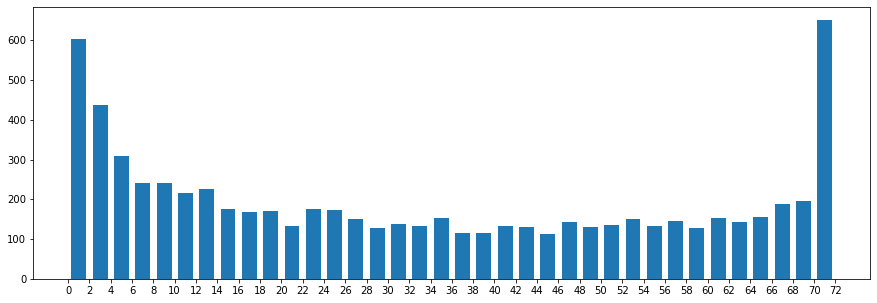

In [125]:
plt.figure(figsize=(15,5))
bins = np.arange(df.tenure.min(), df.tenure.max()+2, 2)
plt.hist(x=df['tenure'],bins=bins,rwidth=0.7)
plt.xticks(np.arange(df.tenure.min(), df.tenure.max()+2, 2));


In [152]:
def Percentage_Countplot(colname):
    ax = sns.countplot(data=df, x=colname)
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

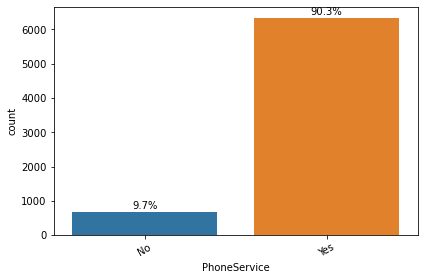

In [153]:
Percentage_Countplot('PhoneService')

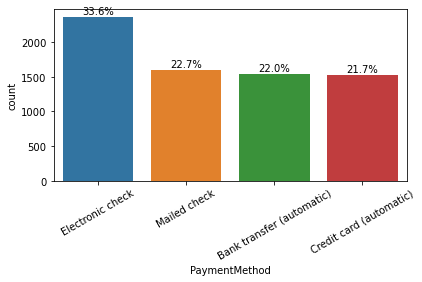

In [154]:
Percentage_Countplot('PaymentMethod')

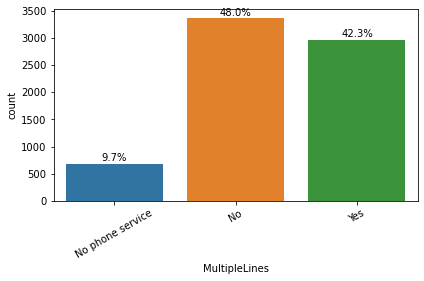

In [155]:
Percentage_Countplot('MultipleLines')

## Bivariate analysis

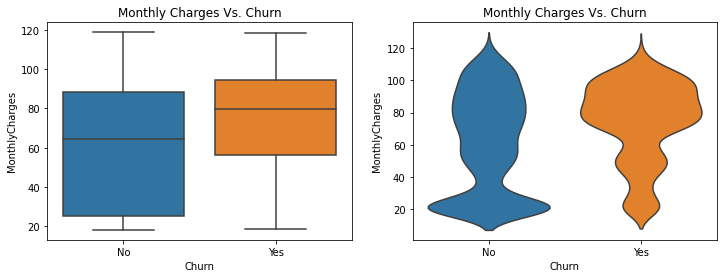

In [157]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sb.boxplot(x=df.Churn, y=df.MonthlyCharges);
plt.title('Monthly Charges Vs. Churn');

plt.subplot(1,2,2)
sb.violinplot(x=df.Churn, y=df.MonthlyCharges, inner=None);
plt.title('Monthly Charges Vs. Churn');

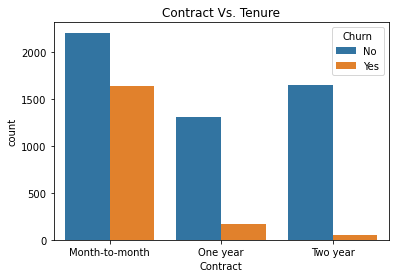

In [158]:
sns.countplot(x=df.Contract, hue=df.Churn);
plt.title('Contract Vs. Tenure');

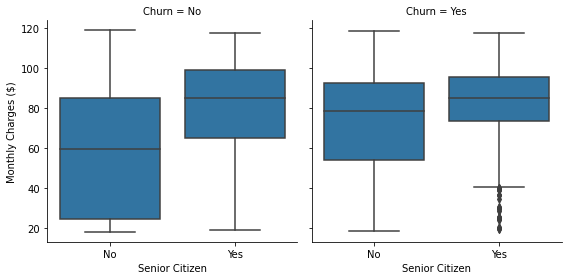

In [159]:
g = sb.FacetGrid(data=df, col='Churn', height = 4);
g.map(sb.boxplot, 'SeniorCitizen', 'MonthlyCharges', order=df.SeniorCitizen.value_counts().index);
g.set_ylabels('Monthly Charges ($)');
g.set_xlabels('Senior Citizen');
plt.xticks([0,1],['No', 'Yes']);

# Statistical analysis

In [185]:
data = df.copy()
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_OHE
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [186]:
#Keeping of categorical features
data = data[[i for i in data.columns if i not in ('Churn','tenure','MonthlyCharges', 'TotalCharges','SeniorCitizen','Churn_OHE')]]

data.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [187]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
    data_encoded[i]=label.fit_transform(data[i])

In [188]:
data_encoded

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7017,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7018,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7019,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


# Chi-square
### The Chi-square test of independence determines if there is a significant relationship between two categorical (i.e. nominal or ordinal) (with two or more mutually exclusive groups) variables. Hence, the null hypothesis is that no relationship exists between the two variables.
* Non-parametric; does not require assumptions about population parameters
* Compares difference in population proportions between groups
* Contingency table of observed values is required.
### It is a test to indicate if the variables are related (i.e. correlated). If they are correlated, we can use the phi coefficient to further determine the strength of the correlation.
* The Chi-square test is sensitive to sample size (i.e. asymptotic)
* As the sample size increases, the absolute differences become a smaller proportion of the expected value.
* The outcome is that a strong association may not surface if sample size is small.
* In large sample sizes, statistical significance may surface while the association is not substantial (i.e. very weak)

## Building of the Corrected Cramer's V function



# Cramer’s V
### Useful to determine the strength of a relationship between categorical variables. Linking the discussion back to Chi-square, assuming a low p-value; presence of dependence(statistically significant dependence between variables). The Cramer V’s helps indicate the strength of this dependence. Would be useful in situations where a statistically significant chi-square could be the result of large sample size instead of substantive relationship between the variables.
* robust against large sample size
* compares the strength of relationship between two categorical variables
* variables should have two or more unique values per category
* if there are only two unique measurement levels, it is the same as Phi Coefficient
* the coefficient ranges from 0 to 1

In [204]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab,correction=True)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
   
cramers_results = np.array(rows)
cramer_DF = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
cramer_DF

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
gender,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Partner,0.0,1.00,0.20,0.00,0.02,0.00,0.02,0.02,0.03,0.02,0.02,0.02,0.09,0.00,0.03
Dependents,0.0,0.20,1.00,0.00,0.00,0.03,0.04,0.03,0.03,0.03,0.02,0.02,0.06,0.01,0.02
PhoneService,0.0,0.00,0.00,1.00,1.00,0.20,0.03,0.03,0.03,0.03,0.03,0.03,0.00,0.00,0.00
MultipleLines,0.0,0.02,0.00,1.00,1.00,0.16,0.05,0.06,0.06,0.05,0.07,0.07,0.01,0.03,0.03
InternetService,0.0,0.00,0.03,0.20,0.16,1.00,0.52,0.50,0.50,0.52,0.51,0.51,0.04,0.14,0.10
OnlineSecurity,0.0,0.02,0.04,0.03,0.05,0.52,1.00,0.52,0.51,0.54,0.50,0.50,0.09,0.12,0.09
OnlineBackup,0.0,0.02,0.03,0.03,0.06,0.50,0.52,1.00,0.52,0.52,0.51,0.51,0.07,0.10,0.08
DeviceProtection,0.0,0.03,0.03,0.03,0.06,0.50,0.51,0.52,1.00,0.53,0.54,0.54,0.09,0.10,0.08
TechSupport,0.0,0.02,0.03,0.03,0.05,0.52,0.54,0.52,0.53,1.00,0.51,0.51,0.11,0.11,0.09


In [192]:
crosstab =pd.crosstab(data['StreamingMovies'],data['DeviceProtection'], rownames=None, colnames=None)
crosstab

DeviceProtection,No,No internet service,Yes
StreamingMovies,,,
No,1950,0,827
No internet service,0,1512,0
Yes,1137,0,1595


In [193]:
crosstab =np.array(pd.crosstab(data['StreamingMovies'],data['DeviceProtection'], rownames=None, colnames=None))

In [203]:
# Details
print(f'chi-square statistic: {chi2_contingency(crosstab)[0]}')
print(f'p-value: {chi2_contingency(crosstab)[1]}')
print(f'degree of freedom: {chi2_contingency(crosstab)[2]}')
print('expected contingency table') 
print(chi2_contingency(crosstab)[3])

chi-square statistic: 7603.816024490806
p-value: 0.0
degree of freedom: 4
expected contingency table
[[1220.99401795  598.03788634  957.96809571]
 [ 664.79760718  325.61515454  521.58723829]
 [1201.20837488  588.34695912  942.444666  ]]


# Phi Coefficient
* compares the strength of the relationship between two categorical variables
* variables only two unique measurement levels
* the coefficient ranges from 0 to 1

In [205]:
n = np.sum(np.sum(crosstab))
# minimum of rows & columns
minshape = min(crosstab.shape)-1
# Phi
chisq_stat = chi2_contingency(crosstab)[0]
Phi_ = np.sqrt( (chisq_stat/n)/minshape)
print(f"Phi Coefficient: {Phi_}")

Phi Coefficient: 0.735870369313615


# Point-biserial correlation
* Used to measure the strength and direction of the association
* between continuous & categorical variable